# Stock Market Analysis

### Results?
#### We will try to answer the following questions after doing stock market data analysis:

How much did the stock price of each company change over time?

What were the daily returns for all the companies?

How are the stocks of the companies related to each other?

How much money do we risk losing by investing in a certain company?

Can we predict future stock behavior?

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

SYS = pd.read_csv('Year_2018/SYS.csv',parse_dates=['Time'],index_col='Time')
NETSOL = pd.read_csv('Year_2018/NETSOL.csv',parse_dates=['Time'],index_col='Time')
AVN = pd.read_csv('Year_2018/AVN.csv',parse_dates=['Time'],index_col='Time')
PTC = pd.read_csv('Year_2018/PTC.csv',parse_dates=['Time'],index_col='Time')
print(SYS.head())
datasets = [SYS,NETSOL,AVN,PTC]

             Open  High    Low  Close  Volume
Time                                         
2018-01-01  75.50  75.5  75.00  75.00    4000
2018-01-02  74.85  76.0  73.11  75.32  197500
2018-01-03  74.03  74.6  72.30  72.75   21000
2018-01-04  71.03  74.5  71.03  74.01  381500
2018-01-05  74.35  77.0  71.00  76.52  180500


In [2]:
SYS['Time'] = pd.to_datetime(SYS.Time)
SYS.set_index('Time',inplace=True)
print(SYS.head())

             Open  High    Low  Close  Volume
Time                                         
2018-01-01  75.50  75.5  75.00  75.00    4000
2018-01-02  74.85  76.0  73.11  75.32  197500
2018-01-03  74.03  74.6  72.30  72.75   21000
2018-01-04  71.03  74.5  71.03  74.01  381500
2018-01-05  74.35  77.0  71.00  76.52  180500


<AxesSubplot:xlabel='Time'>

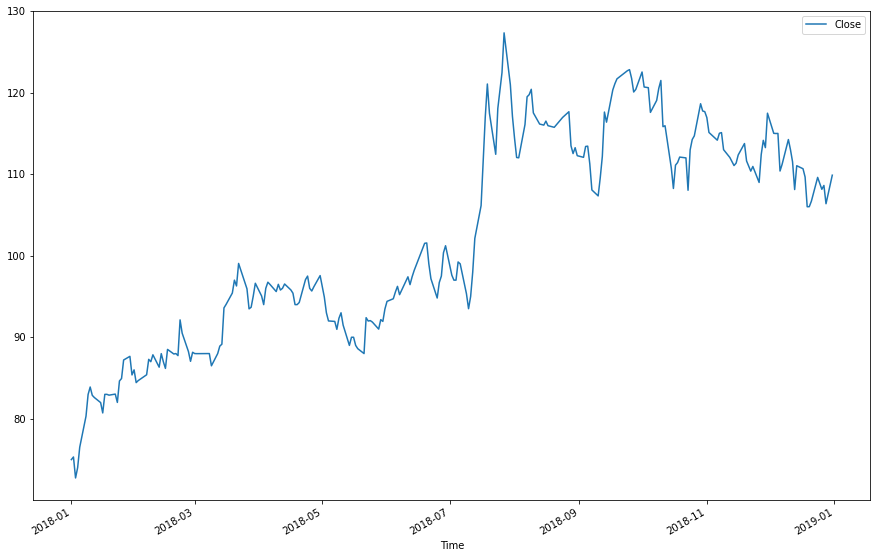

In [4]:
SYS.Close.plot(legend=True,figsize=(15,10))

### Moving Average
We want to observe a smoother and less sensitive progression of the price over time

<AxesSubplot:xlabel='Time'>

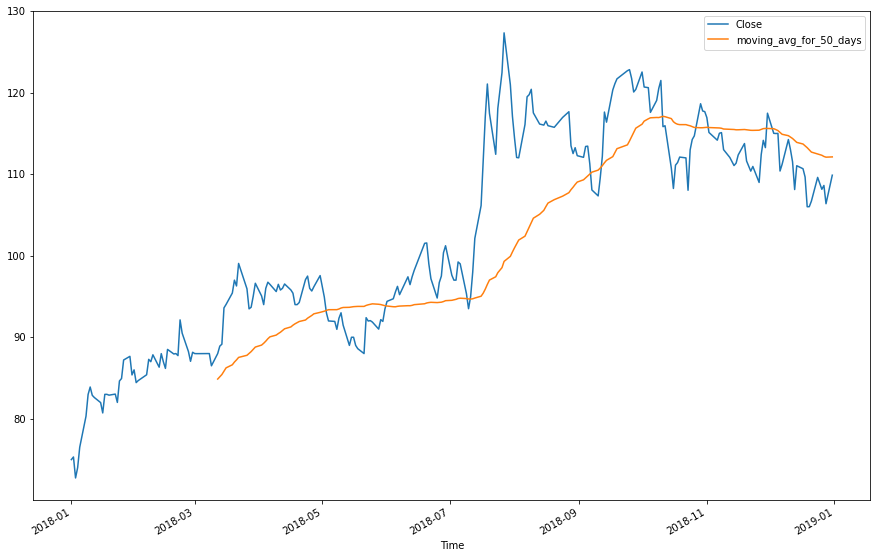

In [6]:
number =50
col = "moving_avg_for_"+str(number)+'_days'
SYS[col] = SYS.Close.rolling(number).mean()
SYS[['Close',col]].plot(figsize=(15,10))

#### Expand more on the rolling mean with more values

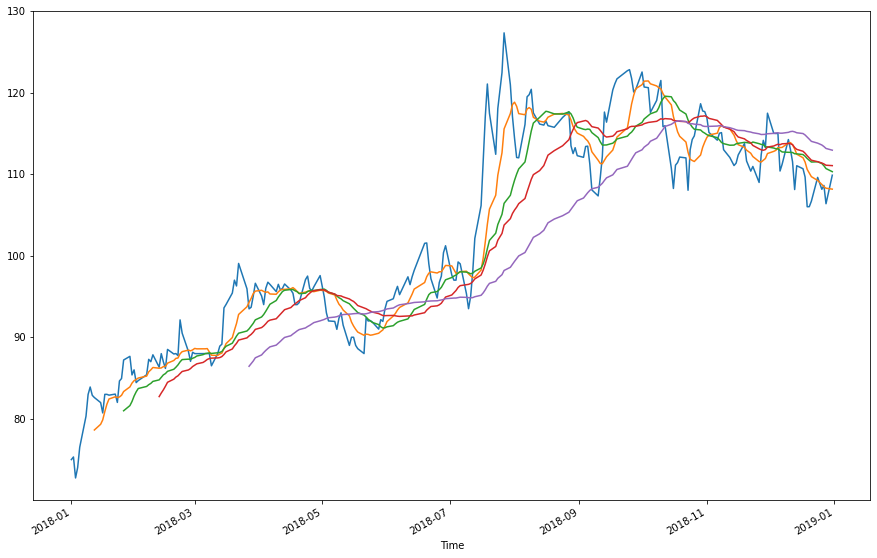

In [9]:
SYS.Close.plot(figsize=(15,10))
numbers =[10,20,30,60]

for number in numbers:
    col = "moving_avg_for_"+str(number)+'_days'
    SYS[col] = SYS.Close.rolling(number).mean()
    SYS[col].plot(figsize=(15,10))

#### Adding the remaining data to the plot
Compare accross companies

<AxesSubplot:xlabel='Time'>

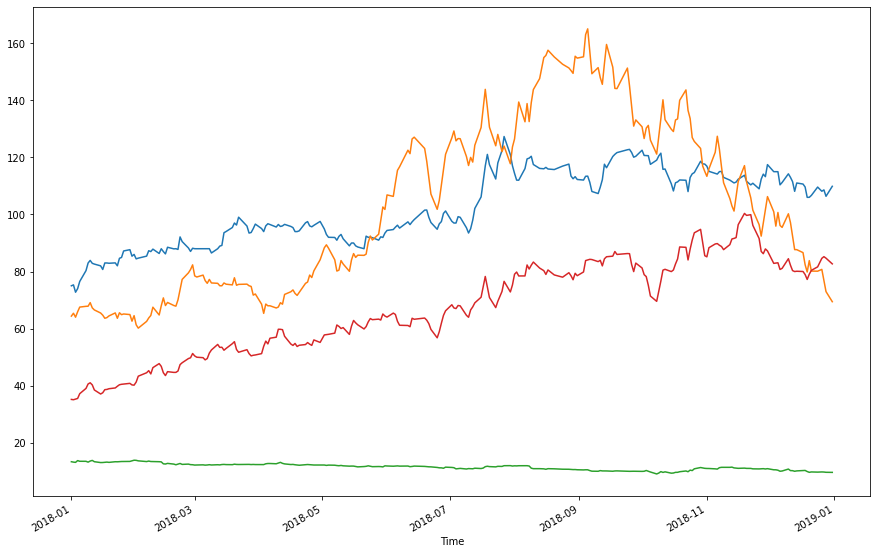

In [16]:
SYS.Close.plot(figsize=(15,10))
NETSOL.Close.plot(figsize=(15,10))
PTC.Close.plot(figsize=(15,10))
AVN.Close.plot(figsize=(15,10))

### Now We take a look at the changes over time

<AxesSubplot:xlabel='Time', ylabel='Percentage change over time'>

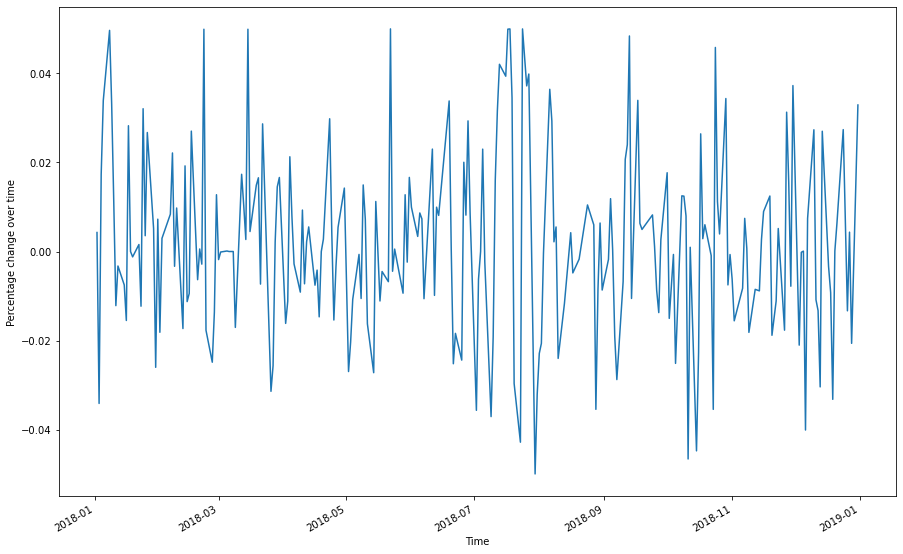

In [17]:
# loop over all datasets and calculate the pct_change for the closing price daily
for data in datasets:
    data['daily_return'] = data['Close'].pct_change()

# assess SYS daily_return column
plt.ylabel('Percentage change over time')
SYS['daily_return'].plot(figsize=(15,10))

C:\Users\Simiel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily_return', ylabel='Density'>

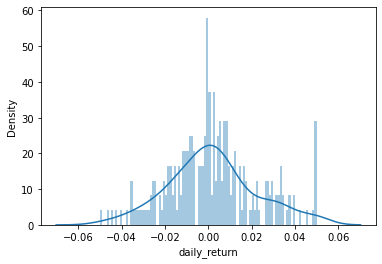

In [21]:
import seaborn as sns
sns.distplot(SYS['daily_return'].dropna(),bins = 100)

#### We observe the distribution of the percentage changes
Most of the values are close to zero, the stock of SYS seem stable over the period